In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# added this to load from my drive
from google.colab import drive
drive.mount('/content/drive')
################################

df = pd.read_csv('/content/drive/MyDrive/Base.csv') # added /content/drive/MyDrive/ in path

target = 'fraud_bool'
X = df.drop(columns=[target]) #Seperate features from target column
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df.info()



Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h

### Description of the Code Above

This cell performs the following tasks:

1. **Imports necessary libraries**:  
   - `os`, `numpy`, `pandas`, `seaborn`, `matplotlib.pyplot`, and `math` for data handling and visualization.  
   - `sklearn.model_selection`, `preprocessing`, and `metrics` for machine learning utilities.

2. **Mounts Google Drive**:  
   - `drive.mount('/content/drive')` connects our Google Drive to the Colab environment so we can access files like `Base.csv`.

3. **Loads the dataset**:  
   - Reads the CSV file located at `/content/drive/MyDrive/Base.csv` into a pandas DataFrame called `df`.

4. **Prepares target and feature variables**:  
   - `target = 'fraud_bool'` identifies the column we want to predict.  
   - `X` contains the feature columns (input variables), and `y` contains the target column (output variable).

5. **Splits the dataset**:  
   - Uses `train_test_split()` to divide our data into 80% training and 20% testing sets.  
   - The `stratify=y` argument ensures the class distribution (fraud vs. non-fraud) is maintained in both sets.

6. **Displays DataFrame information**:  
   - `df.info()` outputs data types, non-null counts, and memory usage for each column in our dataset.


In [2]:
df.describe() #Basic description of data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [3]:
missing_values = df.isnull().sum() #Check for missing values
num_missing = missing_values.sum()
print(f"Number of missing values in dataset: {num_missing}")

Number of missing values in dataset: 0


In [4]:
#Check the number of duplicate instances
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate instances: {num_duplicates}")

Number of duplicate instances: 0


###  Data Quality Checks: Missing and Duplicate Values

In this step, we perform two important data quality checks to ensure our dataset is clean and ready for analysis:

1. **Check for missing values**:
   ```python
   missing_values = df.isnull().sum()
   num_missing = missing_values.sum()
   print(f"Number of missing values in dataset: {num_missing}")
   ```
   - We calculate the total number of missing (null) values across all columns.
   - This helps us decide whether we need to handle any missing data through imputation or removal.
   - In our case, the result shows that there are **0 missing values**, so no further action is needed here.

2. **Check for duplicate rows**:
   ```python
   num_duplicates = df.duplicated().sum()
   print(f"Number of duplicate instances: {num_duplicates}")
   ```
   - We identify any completely duplicated rows in the dataset.
   - Removing duplicates is important to prevent data leakage or skewed model training.
   - In our dataset, there are **0 duplicate rows**, so we are good to proceed.

These checks confirm that our dataset is clean and doesn’t require immediate preprocessing for missing or duplicate data.


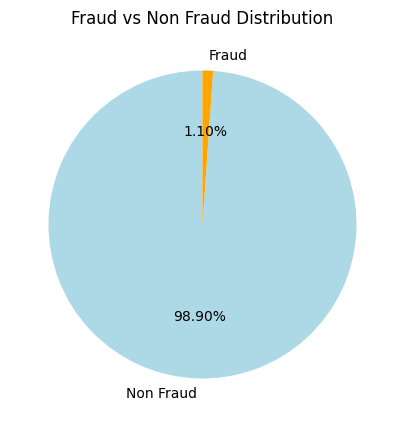

In [5]:
fraud_counts = df['fraud_bool'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non Fraud', 'Fraud'], autopct='%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Fraud vs Non Fraud Distribution')
plt.show()

###  Visualizing Class Distribution: Fraud vs Non-Fraud

In this step, we create a pie chart to visualize the distribution of fraudulent vs. non-fraudulent transactions in our dataset:

```python
fraud_counts = df['fraud_bool'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non Fraud', 'Fraud'], autopct='%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Fraud vs Non Fraud Distribution')
plt.show()
```

#### What this does:
- Calculates the count of each class (fraud and non-fraud) using `value_counts()`.
- Plots those values in a pie chart with:
  - Custom colors (`lightblue` for non-fraud, `orange` for fraud),
  - Percentage labels (`autopct='%.2f%%'`), and
  - A readable layout by rotating the start angle.

#### Insights:
- Our data is **highly imbalanced**, with only **1.1% of transactions labeled as fraud** and **98.9% as non-fraud**.
- This class imbalance is important to address during model training, as it may lead to biased predictions.

We’ll need to keep this imbalance in mind when we build and evaluate our models later (e.g., by using techniques like resampling, class weighting, or specialized metrics).


In [6]:
features = df.drop(columns=['fraud_bool'])


categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()
discrete_candidates = [feat for feat in features.columns if features[feat].dropna().nunique() <= 10]
discrete_features = list(set(discrete_candidates) - set(categorical_features))
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.difference(discrete_features).tolist()


print("Categorical Features:", categorical_features)
print("Discrete Features:", discrete_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Discrete Features: ['income', 'customer_age', 'phone_mobile_valid', 'email_is_free', 'foreign_request', 'device_distinct_emails_8w', 'has_other_cards', 'phone_home_valid', 'keep_alive_session', 'device_fraud_count', 'month']
Numerical Features: ['bank_branch_count_8w', 'bank_months_count', 'credit_risk_score', 'current_address_months_count', 'date_of_birth_distinct_emails_4w', 'days_since_request', 'intended_balcon_amount', 'name_email_similarity', 'prev_address_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'velocity_24h', 'velocity_4w', 'velocity_6h', 'zip_count_4w']


### Feature Type Categorization

In this step, we categorize our features into three types: categorical, discrete, and numerical. This helps guide how we handle them during visualization, preprocessing, and model training.

```python
features = df.drop(columns=['fraud_bool'])

categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()

discrete_candidates = [feat for feat in features.columns if features[feat].dropna().nunique() <= 10]
discrete_features = list(set(discrete_candidates) - set(categorical_features))

numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.difference(discrete_features).tolist()
```

**What each part does:**
- `categorical_features`: Selects columns with data types commonly used for categories (e.g., strings or labeled types).
- `discrete_candidates`: Looks for columns that have 10 or fewer unique values — common for binary or low-range count data.
- `discrete_features`: Removes overlapping categorical features from the discrete list.
- `numerical_features`: Includes all numeric columns that are **not** already classified as discrete.

**Printed Output:**
- **Categorical Features**:  
  `['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']`

- **Discrete Features**:  
  `['customer_age', 'keep_alive_session', 'email_is_free', 'device_fraud_count', 'device_distinct_emails_8w', 'phone_mobile_valid', 'phone_home_valid', 'foreign_request', 'month', 'has_other_cards', 'income']`

- **Numerical Features**:  
  `['bank_branch_count_8w', 'bank_months_count', 'credit_risk_score', 'current_address_months_count', 'date_of_birth_distinct_emails_4w', 'days_since_request', 'intended_balcon_amount', 'name_email_similarity', 'prev_address_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'velocity_24h', 'velocity_4w', 'velocity_6h', 'zip_count_4w']`

This breakdown allows us to apply appropriate techniques for analysis and encoding based on the type of each feature.


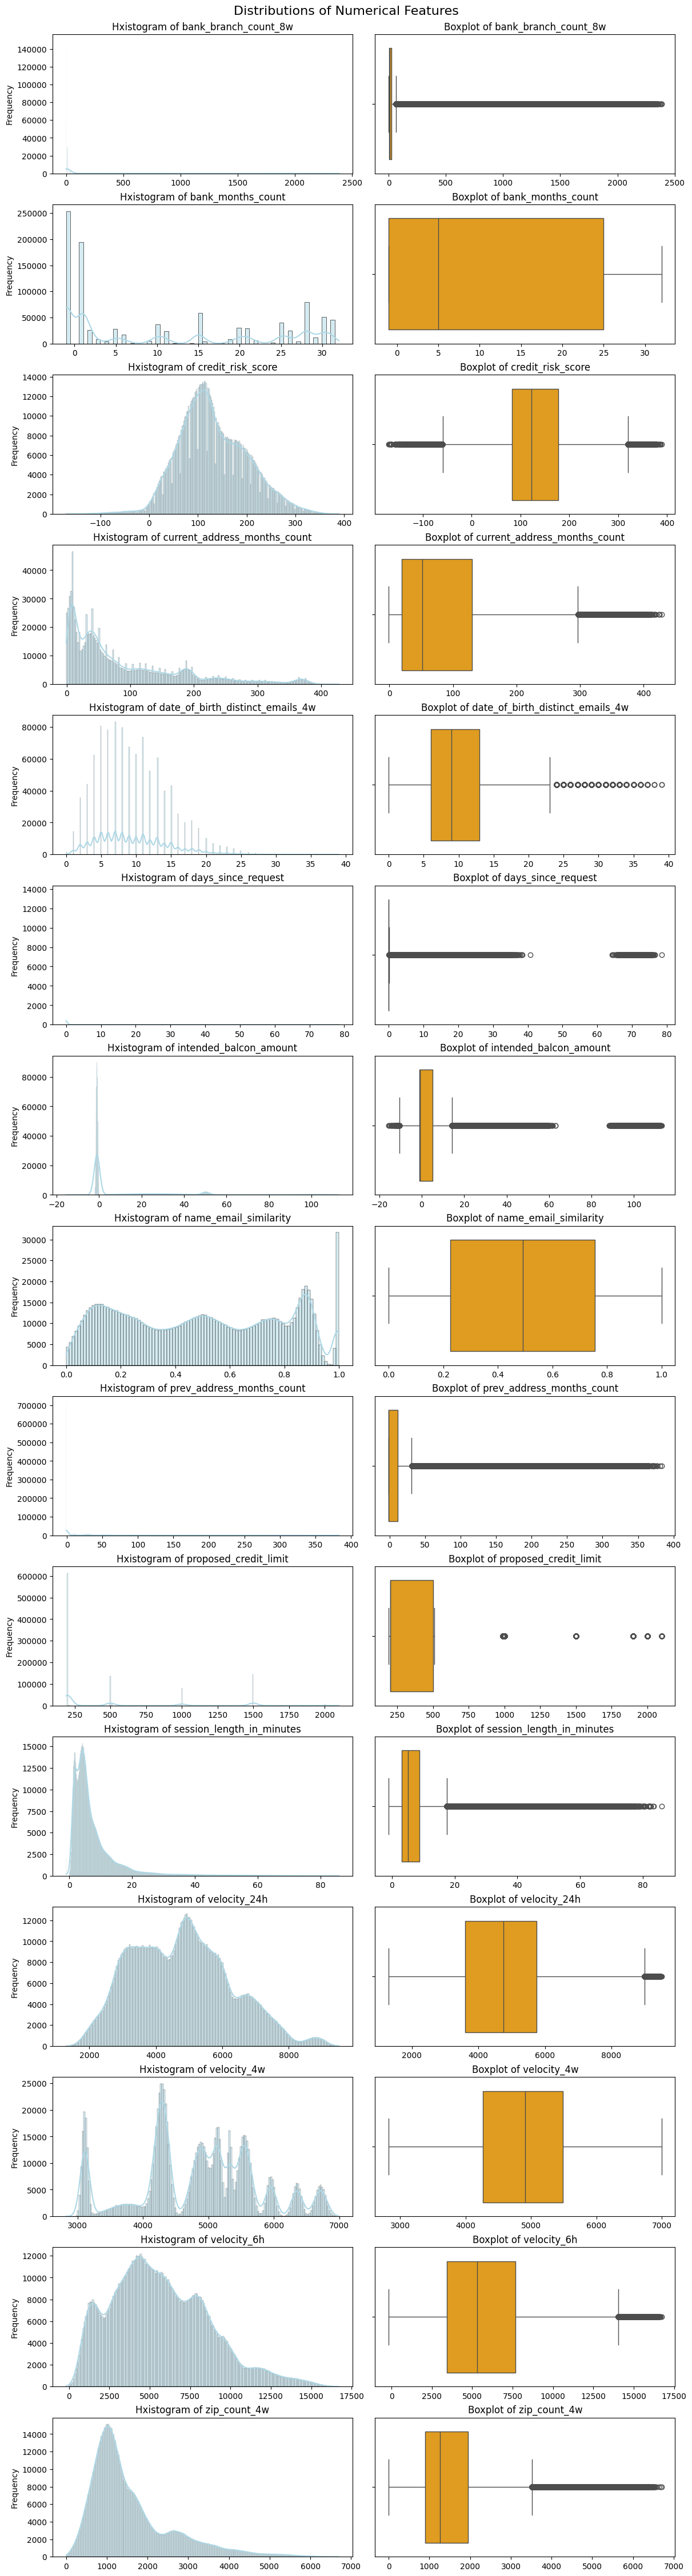

In [7]:
num_numerical = len(numerical_features)


fig, axes = plt.subplots(
    num_numerical, 2,
    figsize=(12, num_numerical *3),
    constrained_layout=True
)


for i, feature in enumerate(numerical_features):
    #Histogram

    sns.histplot(df[feature], ax=axes[i][0], kde=True, color='lightblue')
    axes[i][0].set_title(f"Hxistogram of {feature}")
    axes[i][0].set_xlabel("")
    axes[i][0].set_ylabel("Frequency")

    #Boxplot
    sns.boxplot(x=df[feature], ax=axes[i][1], color='orange')
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].set_xlabel("")

plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()


### Distribution Visualization of Numerical Features

This block of code generates visual summaries for each numerical feature in our dataset using both histograms and boxplots. These plots help us understand the shape, spread, and potential outliers in our data.

**What the code does:**
- Uses `subplots()` to create a vertically stacked grid with two columns: one for histograms and one for boxplots.
- For each numerical feature:
  - Plots a histogram to show the distribution and shape of the data.
  - Plots a boxplot to highlight the median, interquartile range, and outliers.

**Why it's useful:**
- **Histograms** help us identify skewness, modality (e.g. bimodal patterns), and general distribution shapes.
- **Boxplots** make it easy to detect outliers, which can affect model performance or scaling.

This step provides a clear visual understanding of how each numerical feature behaves and helps inform any necessary preprocessing, such as normalization, transformation, or outlier treatment.


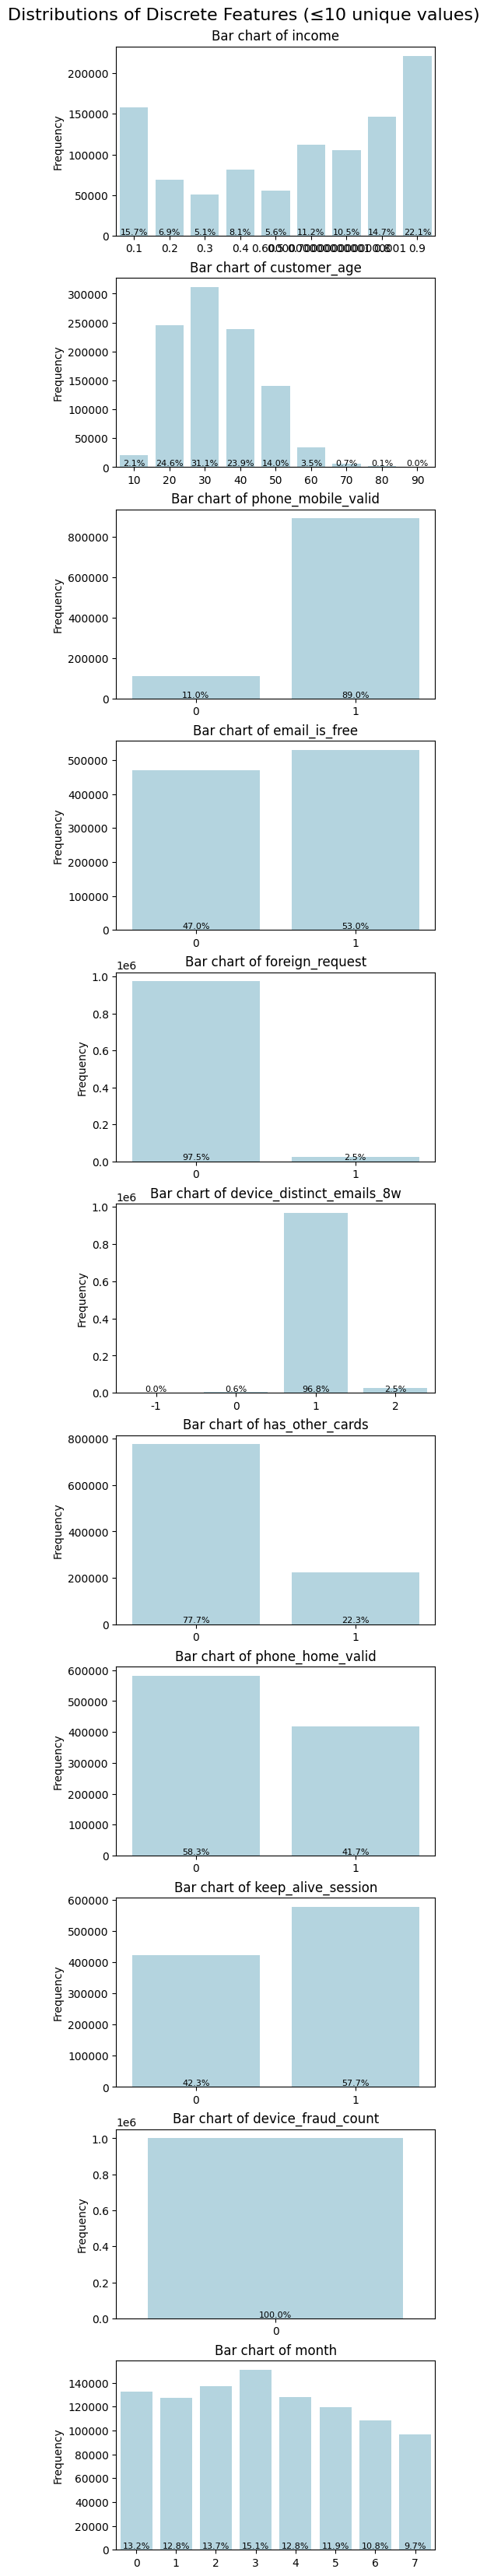

In [8]:
# TODO: For discrete features, make bar graphs with percentage labels
num_discrete = len(discrete_features)

fig, axes = plt.subplots(num_discrete, 1, figsize = (5, num_discrete * 3), constrained_layout=True)


for i, feature in enumerate(discrete_features):
    plot = sns.countplot(data = df, x = feature, ax = axes[i], color = 'lightblue')

    total = len(df[feature].dropna())

    for p in plot.patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            0,
            f"{percentage:.1f}%",
            ha = "center",
            va = "bottom",
            fontsize = 8,
        )

    axes[i].set_title(f"Bar chart of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x')

plt.suptitle("Distributions of Discrete Features (≤10 unique values)", fontsize=16)
plt.show()


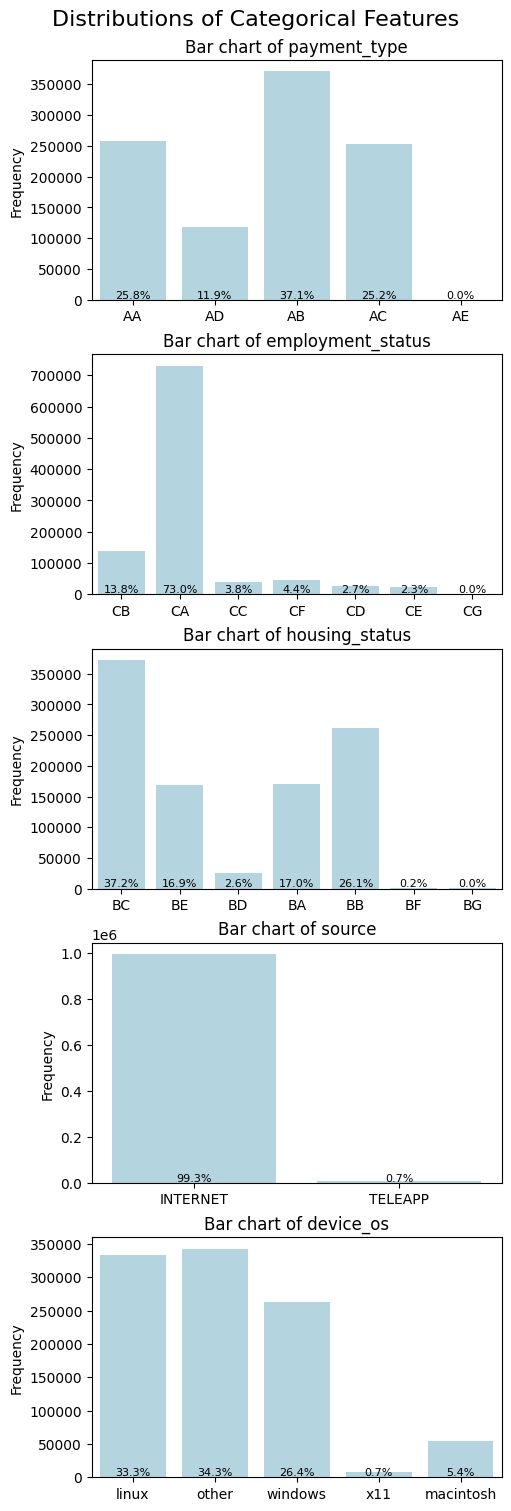

In [9]:
# TODO: For discrete features, make bar graphs with percentage labels
num_categorical = len(categorical_features)

fig, axes = plt.subplots(num_categorical, 1, figsize = (5, num_categorical * 3), constrained_layout=True)


for i, feature in enumerate(categorical_features):
    plot = sns.countplot(data = df, x = feature, ax = axes[i], color = 'lightblue')

    total = len(df[feature].dropna())

    for p in plot.patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            0,
            f"{percentage:.1f}%",
            ha = "center",
            va = "bottom",
            fontsize = 8,
        )

    axes[i].set_title(f"Bar chart of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x')

plt.suptitle("Distributions of Categorical Features", fontsize=16)
plt.show()


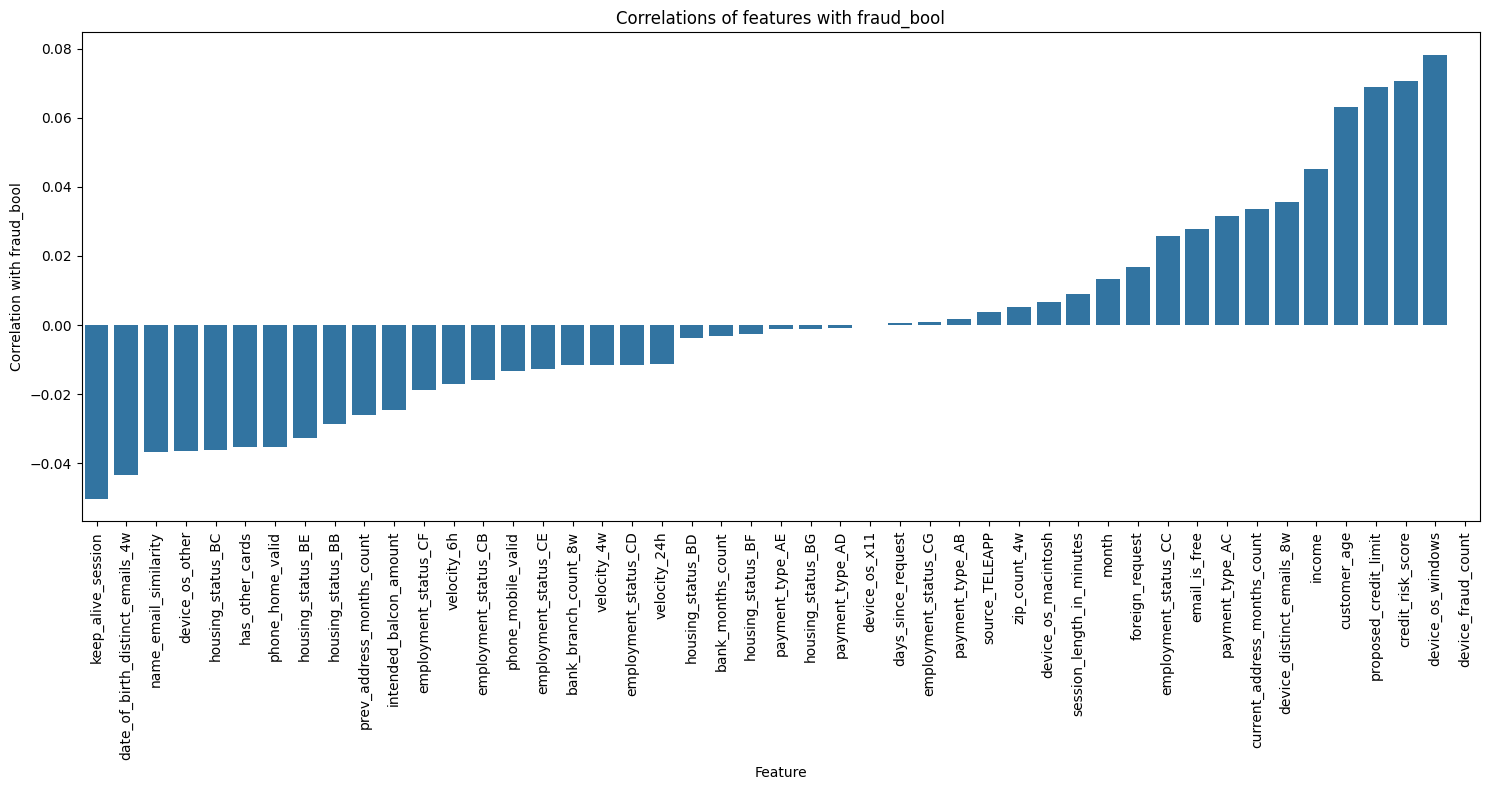

In [10]:
df_oh_encoded = pd.get_dummies(df, drop_first = True)

correlations = df_oh_encoded.corr()[target].drop(target).sort_values()

#Plot correlations
plt.figure(figsize=(15, 8))
sns.barplot(x = correlations.index, y = correlations.values)

plt.xticks(rotation=90)
plt.ylabel('Correlation with fraud_bool')
plt.xlabel('Feature')
plt.title('Correlations of features with fraud_bool')
plt.tight_layout()
plt.show()


### Correlation of Features with Target (fraud_bool)

This block encodes categorical variables, computes feature correlations with the target variable (`fraud_bool`), and visualizes those correlations in a bar plot.

**What this does:**
- `pd.get_dummies()` one-hot encodes all categorical columns. The `drop_first=True` argument avoids multicollinearity by removing one level from each category.
- The correlation matrix is computed using `.corr()`, and only the correlations with `fraud_bool` are kept.
- These correlations are sorted and plotted using a horizontal bar chart.

**Why this is important:**
- The plot helps us identify which features are most positively or negatively associated with fraud.
- Features like `device_fraud_count`, `device_os_windows`, `credit_risk_score`, and `proposed_credit_limit` have relatively strong positive correlations with fraud.
- On the other hand, features such as `keep_alive_session` and `date_of_birth_distinct_emails_4w` show negative correlations.

This visualization helps prioritize which features might be important during model training or which might require deeper inspection or transformation.


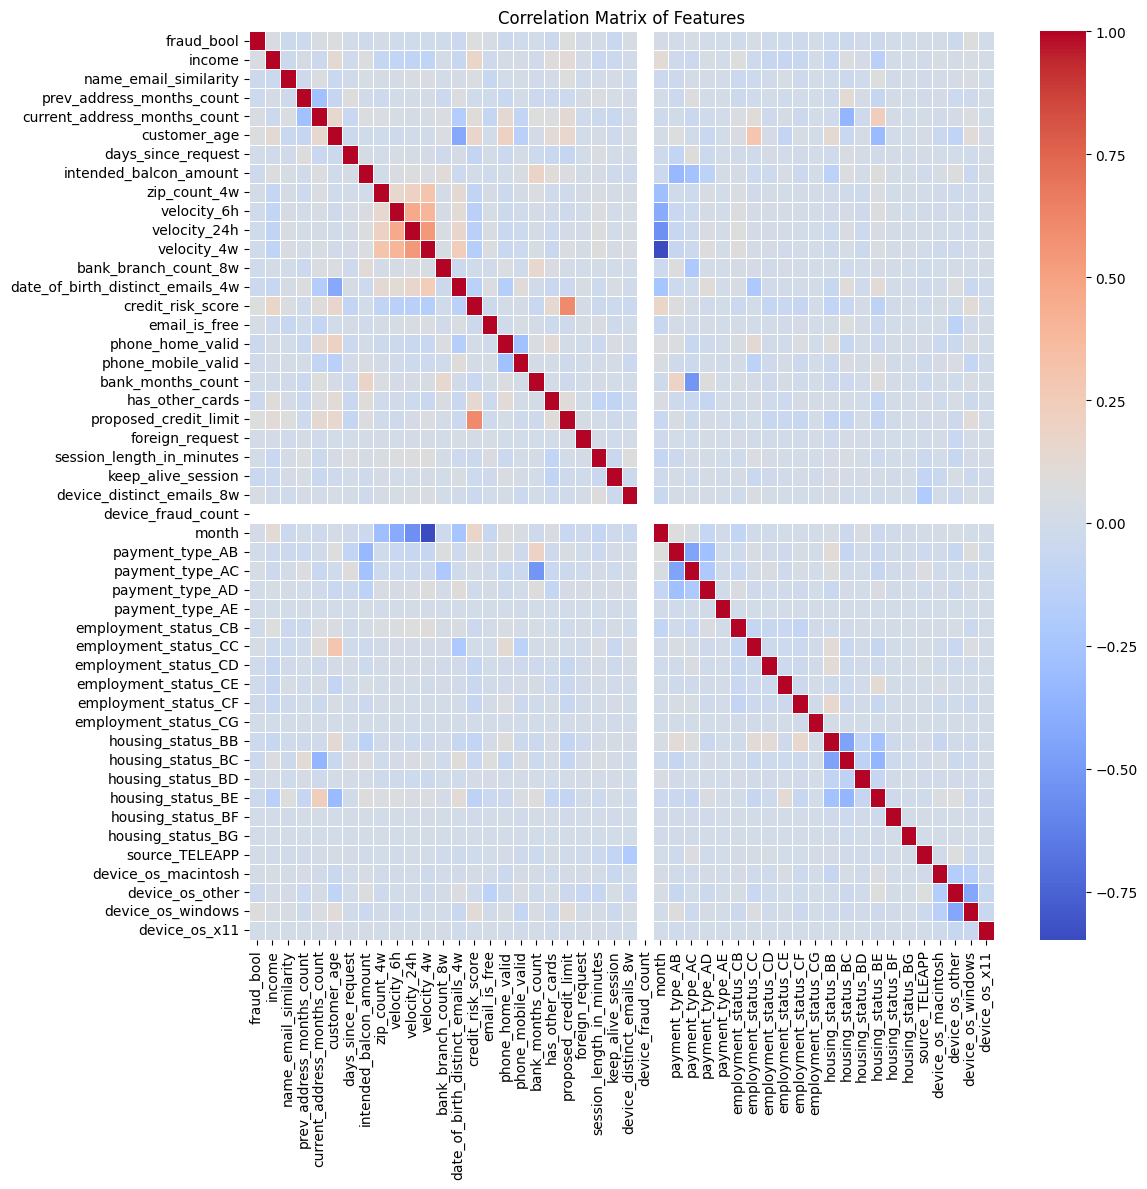

In [11]:
corr_matrix = df_oh_encoded.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

### Correlation Heatmap of All Features

This heatmap provides a complete view of pairwise Pearson correlations between all features in our dataset, including one-hot encoded variables.

The diagonal shows a perfect correlation of 1.0, since each feature is perfectly correlated with itself. Off-diagonal values help us identify:

- **Multicollinearity**: Pairs of features that are highly correlated (positively or negatively). For example, several velocity features and some employment or housing statuses show clusters of correlation.
- **Redundant Features**: Features with very strong linear relationships may not both be necessary for modeling and could potentially be dropped or combined.
- **Target Associations**: The first row shows how strongly each feature correlates with the target `fraud_bool`.

The `coolwarm` colormap helps visualize the direction and strength of relationships:
- Red = strong positive correlation
- Blue = strong negative correlation
- White/neutral = little or no linear relationship

This visualization supports better feature selection and alerts us to potential issues like redundancy that could affect model performance.

In [12]:
#Create array of features to drop
features_to_drop = []

In [13]:
#TODO: remove features with absolute correlation lower than a certain threshold

correlations = df.corr(numeric_only=True)[target].abs()

threshold = 0.015

low_corr_features = correlations[correlations <= threshold].index.tolist()

features_to_drop = list(set(features_to_drop).union(low_corr_features))

print(features_to_drop)


['phone_mobile_valid', 'session_length_in_minutes', 'velocity_24h', 'days_since_request', 'bank_months_count', 'month', 'velocity_4w', 'zip_count_4w', 'bank_branch_count_8w']


### Removing Low-Correlation Features

In this step, we identify and prepare to remove features that have a very weak linear relationship with the target variable (`fraud_bool`).

We calculate the absolute correlation between each numerical feature and the target. Features with an absolute correlation below a small threshold (in this case, 0.015) are considered uninformative for prediction and are added to a list of features to drop.

**Why this matters:**
- Features with very low correlation to the target may not contribute meaningfully to the model.
- Removing such features can simplify the model, reduce noise, and improve training time.

The result is a list of features such as:
```
['zip_count_4w', 'velocity_24h', 'phone_mobile_valid', 'velocity_4w',
 'bank_months_count', 'month', 'bank_branch_count_8w',
 'days_since_request', 'session_length_in_minutes']
```

These features can be dropped from the dataset before model training to improve focus on more relevant predictors.

In [14]:
#Features where -1 indicates missing values
cols_missing_data = [
    'device_distinct_emails_8w',
    'current_address_months_count',
    'session_length_in_minutes',
    'bank_months_count',
    'prev_address_months_count'
]



missing_data_info = {
    'Feature': [],
    'Missing Instances Number': [],
    'Missing Instances Percentage': []
}

for col in cols_missing_data:
    total_missing = (df[col] == -1).sum()
    percent_missing = 100 * total_missing / len(df)
    missing_data_info['Feature'].append(col)
    missing_data_info['Missing Instances Number'].append(total_missing)
    missing_data_info['Missing Instances Percentage'].append(percent_missing)

missing_neg1_df = pd.DataFrame(missing_data_info)

missing_neg1_df = missing_neg1_df.sort_values(by='Missing Instances Percentage', ascending=False)

print(missing_neg1_df)


                        Feature  Missing Instances Number  \
4     prev_address_months_count                    712920   
3             bank_months_count                    253635   
1  current_address_months_count                      4254   
2     session_length_in_minutes                      2015   
0     device_distinct_emails_8w                       359   

   Missing Instances Percentage  
4                       71.2920  
3                       25.3635  
1                        0.4254  
2                        0.2015  
0                        0.0359  


### Checking for Features with `-1` Representing Missing Values

In some datasets, missing values aren’t always labeled as `NaN` or left blank. Instead, a special value like `-1` is used to indicate that the data is unavailable or not provided. In our dataset, we noticed that certain features use `-1` to represent missing values. This can lead to incorrect interpretations if we treat `-1` as a real value, so it’s important to identify and handle them appropriately.

To do this, we focused on five specific columns where we expect missing data to be marked as `-1`:
- `device_distinct_emails_8w`
- `current_address_months_count`
- `session_length_in_minutes`
- `bank_months_count`
- `prev_address_months_count`

We wrote a loop that:
1. Counts how many rows contain `-1` in each of these columns.
2. Calculates what percentage of the entire dataset that count represents.

The results showed that some features have a small amount of missing data, like `device_distinct_emails_8w` (only 0.04%), while others like `prev_address_months_count` have a **very high** percentage of missing values — over 71%. Here’s a summary of the findings:

| Feature                     | Missing Values | Percentage Missing |
|-----------------------------|----------------|--------------------|
| prev_address_months_count   | 712,920        | 71.29%             |
| bank_months_count           | 253,635        | 25.36%             |
| current_address_months_count | 4,254         | 0.43%              |
| session_length_in_minutes   | 2,015          | 0.20%              |
| device_distinct_emails_8w   | 359            | 0.04%              |

### Why This Step Matters

Identifying these patterns helps us make decisions:
- If a feature has a **very high percentage** of missing values (like 70%+), we may want to consider removing it entirely, since it might not be reliable.
- For features with **low to moderate** missing values, we can fill in the gaps (impute) using strategies like replacing them with the mean, median, or a prediction model.

This analysis helps ensure our data is clean and that our machine learning model won't learn misleading patterns from invalid data.


In [15]:
high_missing_features = ['prev_address_months_count', 'bank_months_count']
features_to_drop = list(set(features_to_drop).union(high_missing_features))
print(features_to_drop)

['phone_mobile_valid', 'session_length_in_minutes', 'bank_branch_count_8w', 'days_since_request', 'bank_months_count', 'month', 'velocity_4w', 'prev_address_months_count', 'zip_count_4w', 'velocity_24h']


In [16]:
#ToDo> remove features with high multicollinarity
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feature_1 = corr_matrix.columns[i]
        feature_2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]

        if abs(correlation) > 0.8:
            if feature_1 not in features_to_drop and feature_2 not in features_to_drop:
                features_to_drop.append(feature_2)

print(features_to_drop)

['phone_mobile_valid', 'session_length_in_minutes', 'bank_branch_count_8w', 'days_since_request', 'bank_months_count', 'month', 'velocity_4w', 'prev_address_months_count', 'zip_count_4w', 'velocity_24h']


In [17]:
numerical_features_to_keep = list(set(numerical_features) - set(features_to_drop))

scaler = StandardScaler()
X_train[numerical_features_to_keep] = scaler.fit_transform(X_train[numerical_features_to_keep])
X_test[numerical_features_to_keep] = scaler.transform(X_test[numerical_features_to_keep])


print("X_train after standardization:")
print(X_train[numerical_features_to_keep].describe().round(2))
print("\nX_test after standardization:")
print(X_test[numerical_features_to_keep].describe().round(2))

X_train after standardization:
       current_address_months_count  name_email_similarity  \
count                     800000.00              800000.00   
mean                          -0.00                  -0.00   
std                            1.00                   1.00   
min                           -0.99                  -1.71   
25%                           -0.76                  -0.93   
50%                           -0.39                  -0.01   
75%                            0.49                   0.91   
max                            3.86                   1.75   

       proposed_credit_limit  credit_risk_score  intended_balcon_amount  \
count              800000.00          800000.00               800000.00   
mean                   -0.00               0.00                    0.00   
std                     1.00               1.00                    1.00   
min                    -0.67              -4.32                   -1.20   
25%                    -0.65       

In [18]:
#Drop features from X_train and X_test and apply one-hot-encoding
X_train = X_train.drop(columns=features_to_drop, errors='ignore')
X_test = X_test.drop(columns=features_to_drop, errors='ignore')

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)


print(X_train_encoded.columns.tolist())


['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'intended_balcon_amount', 'velocity_6h', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(random_state = 42, max_iter = 1000, class_weight = "balanced")

model.fit(X_train_encoded, y_train)

y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

prob_threshold = 0.85
y_pred_custom = (y_pred_proba >= prob_threshold).astype(int)

print(f"Classification Report\n")
print(classification_report(y_test, y_pred_custom))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197794
           1       0.12      0.41      0.18      2206

    accuracy                           0.96    200000
   macro avg       0.56      0.69      0.58    200000
weighted avg       0.98      0.96      0.97    200000


ROC AUC Score: 0.8723680078849035


### Feature Cleanup, Scaling, and Logistic Regression Modeling

#### 1. Dropping High-Missing and Highly Correlated Features

We began this step by adding two features — `prev_address_months_count` and `bank_months_count` — to our existing `features_to_drop` list because they had a very high percentage of missing values (over 25% and 71% respectively). These features may not be reliable enough to keep in the dataset.

Next, we checked for **multicollinearity** by looping through our correlation matrix. We looked for pairs of features that had a correlation coefficient greater than 0.8 (either positively or negatively). If two features were strongly correlated, we removed one of them to avoid redundancy in our model. Redundant features can confuse the model, inflate importance, or increase overfitting risk.

The final list of dropped features includes those with:
- Weak correlation with the target
- High missing values
- High multicollinearity with another feature

---

#### 2. Scaling the Remaining Numerical Features

We then applied **standardization** to the remaining numerical features — this transforms the features to have:
- A mean of 0
- A standard deviation of 1

We used `StandardScaler` from `sklearn`, which is especially helpful for models that are sensitive to feature scales like logistic regression. This also helps speed up convergence during model training.

After standardization, we confirmed it worked by printing summary statistics for both the training and test sets. The standardized features show means close to 0 and standard deviations of 1, as expected.

---

#### 3. Finalizing the Dataset for Modeling

Before training the model, we did one last preparation step:
- Dropped all the features listed in `features_to_drop` from both `X_train` and `X_test`
- Applied **one-hot encoding** to categorical variables using `pd.get_dummies()`, and
- Aligned the columns of `X_train_encoded` and `X_test_encoded` to make sure both datasets have the same structure after encoding

This ensures the model sees the same feature set during both training and testing.

---

#### 4. Training the Logistic Regression Model

We chose **Logistic Regression** as our baseline model for binary classification. Key parameters used:
- `random_state=42` for reproducibility
- `max_iter=1000` to ensure the model converges
- `class_weight='balanced'` to handle class imbalance between fraud and non-fraud cases

After fitting the model, we used `.predict_proba()` to get probability scores for each instance in the test set. Then, instead of using the default 0.5 threshold, we set a **custom threshold of 0.85** to increase precision — meaning the model only flags fraud when it is very confident.

---

#### 5. Model Evaluation

We printed the following evaluation metrics:
- **Classification Report**: Includes precision, recall, F1-score, and support for each class
- **ROC AUC Score**: Measures the model's ability to distinguish between the classes, regardless of the decision threshold

Using a custom threshold allows us to prioritize catching true fraud cases while reducing false positives, which is often a goal in fraud detection systems.

---

This marks the completion of our end-to-end preprocessing and baseline modeling. We can now experiment with other models, perform cross-validation, tune thresholds further, or explore advanced techniques like ensemble methods.


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# --- choose the columns we decided to keep earlier ---
num_cols = numerical_features_to_keep          # continuous numbers
cat_cols = categorical_features                # words / categories

# pipeline for numeric columns: (1) fill blanks, (2) standardise
numeric_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale",  StandardScaler())
])

# pipeline for categorical columns: (1) fill blanks, (2) one-hot encode
categorical_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# tie the two mini-pipelines together
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"          # everything in features_to_drop is silently removed
)

### Bundle all data-cleaning rules into a preprocessing pipeline

Right now we have separate snippets for filling in missing values, scaling numbers, and one-hot encoding text. That’s fine while we experiment, but when the time comes to feed brand-new data (for example when the system is live) we will need those same steps performed in exactly the same order. A Pipeline/ColumnTransformer is simply scikit-learn’s way of gift-wrapping that assembly line so it never forget a stage.

---

### Preprocessing Pipeline for Numerical and Categorical Features

At this point, we’ve finalized which features to keep in our dataset after removing low-correlation, high-missing, and multicollinear variables. Now, we’re building a clean and reusable preprocessing pipeline that prepares the data for modeling.

To handle this in a structured way, we use **scikit-learn's `Pipeline` and `ColumnTransformer`** tools. These allow us to define a set of transformation steps for different column types and apply them in one go.

---

#### 1. Selecting the Columns to Keep

We split the features into two groups:
- `num_cols`: Numerical (continuous) features, such as scores and time durations
- `cat_cols`: Categorical features, such as payment type, housing status, or device OS

These were already cleaned and finalized earlier in the workflow.

---

#### 2. Defining a Pipeline for Numerical Columns

For numeric columns, we apply two steps:
1. **Imputation**: Fill in missing values using the median of each column. This is robust against outliers.
2. **Scaling**: Standardize the values to have a mean of 0 and a standard deviation of 1 using `StandardScaler`.

This ensures all numeric inputs are on the same scale, which is important for models that rely on distance or weight magnitudes.

---

#### 3. Defining a Pipeline for Categorical Columns

For categorical features, we also apply two steps:
1. **Imputation**: Fill in any missing values using the most frequent (mode) value from that column.
2. **One-Hot Encoding**: Convert the categorical labels into binary columns so that models can understand them. For example, a column with values `['A', 'B', 'C']` becomes three separate columns like `[is_A, is_B, is_C]`.

We set `handle_unknown='ignore'` so that the encoder won’t crash if it sees new categories during prediction.

---

#### 4. Combining the Pipelines

Finally, we combine both the numeric and categorical pipelines into a single **ColumnTransformer** called `preprocess`.

- This object will apply the numeric pipeline to `num_cols` and the categorical pipeline to `cat_cols`.
- Any other columns (such as those we marked in `features_to_drop`) are excluded using `remainder='drop'`.

This setup gives us a clean and professional way to prepare the data before feeding it into a machine learning model. It also makes our workflow more modular and reproducible.

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier

gb_clf = HistGradientBoostingClassifier(
            learning_rate     = 0.05,    # step size
            max_depth         = 5,       # limits over-fitting
            l2_regularization = 1.0,     # further regularisation
            class_weight      = {0:1, 1:10},  # make each fraud row worth 10 normal rows
            random_state      = 42
)

### Defining a Gradient Boosting Classifier for Fraud Detection

In this step, we set up a **gradient boosting classifier** to predict fraud. Specifically, we use the `HistGradientBoostingClassifier` from `sklearn.ensemble`, which is a fast, efficient implementation of gradient boosting designed to handle large datasets.

This model is a good choice for structured/tabular data like ours because it automatically handles missing values and doesn’t require one-hot encoding (though we already encoded our data earlier).

---

#### Model Configuration:

We carefully choose a few key hyperparameters to balance performance and prevent overfitting:

- **`learning_rate = 0.05`**  
  This controls how much the model adjusts in response to each new tree it adds. A lower value means slower but more stable learning.

- **`max_depth = 5`**  
  Limits how deep each decision tree can go. A smaller depth helps prevent the model from memorizing the training data (overfitting).

- **`l2_regularization = 1.0`**  
  Adds a penalty to the model’s complexity. This helps keep the model general and avoids overfitting by discouraging overly complex trees.

- **`class_weight = {0:1, 1:10}`**  
  This is especially important for our case. Fraud cases are much rarer than non-fraud cases, so we manually give more "importance" to fraud rows. By weighting fraud 10× higher, we encourage the model to take those cases seriously during training.

- **`random_state = 42`**  
  Ensures reproducibility by fixing the random seed.

---

This classifier is designed to be a strong, balanced model for our fraud detection task, and it’s particularly helpful when dealing with **imbalanced datasets**, like the one we have.


In [22]:
from imblearn.pipeline import Pipeline as ImbPipeline  # allows future SMOTE etc.

full_pipe = ImbPipeline([
    ("prep",  preprocess),   # step 1: data gets cleaned and encoded
    ("model", gb_clf)        # step 2: clean data enters the boosted trees
])


### Chain the cleaner and the learner into one super-pipeline
From now on we'll only ever call .fit() or .predict() on this one object.
Internally it first cleans the raw row, then hands the polished numbers to the model.

---

In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth"    : [3, 5, None],
    "model__class_weight" : [{0:1, 1:w} for w in (5, 10, 20)]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = GridSearchCV(
            estimator = full_pipe,
            param_grid = param_grid,
            scoring    = "average_precision",
            cv         = cv,
            n_jobs     = -1,
            verbose    = 2
)

search.fit(X_train, y_train)     # raw X_train—cleaning happens inside the pipe
best_pipe = search.best_estimator_
print("Best PR-AUC (CV):", search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best PR-AUC (CV): 0.10857046465942535


### Let the computer fine-tune the model’s “knobs”

Parameters like learning_rate, max_depth, or the fraud weight all change the bias/variance balance. A grid search with cross-validation tries many reasonable combinations and keeps the one that scores best on average precision (area under the precision-recall curve, a metric that cares most about the minority class).

In [24]:
# ❶ Inspect which hyper‑parameters actually won
print("Best settings:", search.best_params_)


Best settings: {'model__class_weight': {0: 1, 1: 10}, 'model__learning_rate': 0.1, 'model__max_depth': 3}


In [25]:
from sklearn.metrics import (average_precision_score, roc_curve, roc_auc_score,
                             precision_recall_curve, classification_report,
                             confusion_matrix)

# ❷ Pull the fully‑trained best pipeline
best_pipe = search.best_estimator_

# ❸ Get fraud probabilities for every test row
y_prob = best_pipe.predict_proba(X_test)[:, 1]

# ❹ High‑level metrics
print("Test ROC‑AUC :", roc_auc_score(y_test, y_prob))
print("Test PR‑AUC  :", average_precision_score(y_test, y_prob))


Test ROC‑AUC : 0.8549771362534925
Test PR‑AUC  : 0.11813096867561107


In [33]:
# ❺ Build full PR curve to choose a threshold
prec, rec, thr = precision_recall_curve(y_test, y_prob)

# Here we choose the threshold that maximises F2 (recall‑heavy)
f2 = (5 * prec * rec) / (4 * prec + rec)     # Fβ, β = 2
best_idx  = f2.argmax()
best_thr  = thr[best_idx]
print(f"Chosen threshold for F2 ≈ {best_thr:.3f}")


# ❻ Turn probabilities into hard 0/1 calls
y_pred = (y_prob >= best_thr).astype(int)

# ❼ Detailed report
print(classification_report(y_test, y_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



#We want to limit false positives to 5% as recommended in the BAF paper by Feedzai.
#To do that we must find the appropriate probability threshold that yields ~5% false positives
#We do this by computing the ROC curve and finding the threshold closest to the target FPR

fpr, tpr, thresh = roc_curve(y_test, y_prob)

min_index = np.argmin(np.abs(fpr - 0.05)) #find index of threshold cloesest to target FPR

#Acquire the threshold and TPR at 5% FPR. The TPR is our main measure of success
roc_thresh = thresh[min_index]
roc_tpr = tpr[min_index]


#Print the threshold we found and associated TPR
print("\n\nThreshold at 5% FPR:", f"{roc_thresh:.3f}")
print("TPR at 5% FPR:", f"{roc_tpr:.3f}")

#Convert predicted probabilities to either 1 or 0 depending on threashold. 1 is designated as fraud. 0 is designated as non-fraud.
y_pred_roc = (y_prob >= roc_thresh).astype(int)

#Show classification report using this threshold
print("\nClassification report (roc-threshold):")
print(classification_report(y_test, y_pred_roc, digits=3))


Chosen threshold for F2 ≈ 0.343
              precision    recall  f1-score   support

           0      0.993     0.963     0.978    197794
           1      0.105     0.389     0.166      2206

    accuracy                          0.957    200000
   macro avg      0.549     0.676     0.572    200000
weighted avg      0.983     0.957     0.969    200000

Confusion matrix:
 [[190509   7285]
 [  1347    859]]


Threshold at 5% FPR: 0.296
TPR at 5% FPR: 0.447

Classification report (roc-threshold):
              precision    recall  f1-score   support

           0      0.994     0.950     0.971    197794
           1      0.091     0.447     0.151      2206

    accuracy                          0.944    200000
   macro avg      0.542     0.698     0.561    200000
weighted avg      0.984     0.944     0.962    200000



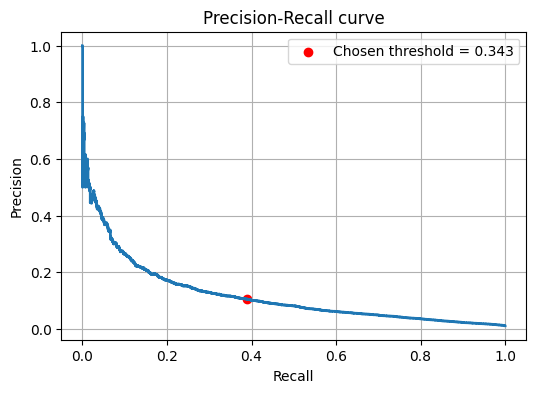

In [27]:
# ❽ Plot the precision–recall curve
plt.figure(figsize=(6,4))
plt.plot(rec, prec, lw=2)
plt.scatter(rec[best_idx], prec[best_idx], marker='o', color='red',
            label=f"Chosen threshold = {best_thr:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision‑Recall curve")
plt.legend(); plt.grid(True); plt.show()


In [28]:
import joblib
joblib.dump(best_pipe, "fraud_detector_v1.joblib")

['fraud_detector_v1.joblib']

### Building a Pipeline, Tuning Hyperparameters, and Evaluating a Fraud Detection Model

#### 1. Creating a Combined Pipeline (Preprocessing + Model)

We first build a **full pipeline** using `ImbPipeline` from `imblearn`, which allows us to later integrate techniques like SMOTE if needed. This pipeline chains together:
- `"prep"`: Our custom preprocessing pipeline that handles imputation, scaling, and one-hot encoding
- `"model"`: The `HistGradientBoostingClassifier` we previously defined

This setup allows us to treat the entire training process as a single object that handles everything from raw input to predictions.

---

#### 2. Performing Grid Search with Cross-Validation

We use `GridSearchCV` with 5-fold stratified cross-validation to fine-tune the model’s hyperparameters. The parameters we test include:
- `learning_rate`: Controls how fast the model learns
- `max_depth`: Limits tree depth to prevent overfitting
- `class_weight`: Balances the importance of fraud vs. non-fraud cases by adjusting sample weights

We use `"average_precision"` as the evaluation metric because it is appropriate for **imbalanced datasets**—it focuses on the quality of ranking predictions, especially for the minority class.

This search tests 27 combinations and selects the best one based on cross-validated performance.

---

#### 3. Identifying the Best Parameters and Evaluating the Final Model

After grid search, we inspect the **best set of hyperparameters** and use the final trained pipeline (with those best settings) to make predictions on the test set.

We compute two key metrics:
- **ROC-AUC**: Measures how well the model ranks positive examples higher than negative ones.
- **PR-AUC**: The average precision under the precision-recall curve, more sensitive to class imbalance.

---

#### 4. Choosing an Optimal Probability Threshold Using the F2 Score

Instead of using the default threshold of 0.5 to convert probabilities into binary predictions, we compute the full **precision-recall curve** and select a threshold that **maximizes the F2 score**.

The F2 score prioritizes **recall over precision**, which is important in fraud detection since missing a fraud case is more costly than a false alarm.

Once the best threshold is chosen, we:
- Recompute predictions using it
- Print a detailed classification report
- Show the confusion matrix to visualize true/false positives and negatives

---

#### 5. Plotting the Precision-Recall Curve

We visualize the full precision-recall trade-off curve and mark the chosen threshold on it. This helps us better understand how our model’s behavior changes at different cutoff points.

The curve gives us insight into how well the model separates fraud and non-fraud cases across different confidence levels.

---

#### 6. Saving the Final Model

Finally, we save the **entire trained pipeline** (including preprocessing and the tuned model) using `joblib`. This allows us to reload it later for future predictions without retraining.

The saved file `fraud_detector_v1.joblib` can be used to run predictions on new data using:
```python
from joblib import load
model = load("fraud_detector_v1.joblib")
predictions = model.predict(new_data)
```

This completes the training and deployment-ready packaging of our fraud detection model.
